## FSM: SUPERVISED LEARNING- REGRESSION

# FSM: SUPERVISED LEARNING- REGRESSION

Implementation of the Linear Regression algorithm from scratch in Python using Numpy and Pandas

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linReg(x_train, y_train):
    # Add a column of ones for the intercept term
    x_train = np.column_stack((np.ones(len(x_train)), x_train))
    
    # Calculate the theta values using the normal equation
    xT_x_inv = np.linalg.inv(np.dot(x_train.T, x_train))
    theta = np.dot(np.dot(xT_x_inv, x_train.T), y_train)
    
    return theta

In [5]:
#Loading the dataset
data = pd.read_csv("Medical Price Dataset (1).csv")

# Prepare training data
x_train = data[['age', 'bmi', 'children']].values
y_train = data['charges'].values


# Perform data preprocessing (one-hot encoding for categorical variables)
sex_encoded = pd.get_dummies(data['sex'], drop_first=True).values
smoker_encoded = pd.get_dummies(data['smoker'], drop_first=True).values
region_encoded = pd.get_dummies(data['region'], drop_first=True).values

x_train = np.column_stack((x_train, sex_encoded, smoker_encoded, region_encoded))

# Perform linear regression
theta = linReg(x_train, y_train)

# Predict the y values
y_pred = np.dot(np.column_stack((np.ones(len(x_train)), x_train)), theta)

#Results
print("Co-effecients: ",theta[1:])
print("Intercept:", theta[0])

Co-effecients:  [  256.85635254   339.19345361   475.50054515  -131.3143594
 23848.53454191  -352.96389942 -1035.02204939  -960.0509913 ]
Intercept: -11938.53857616707


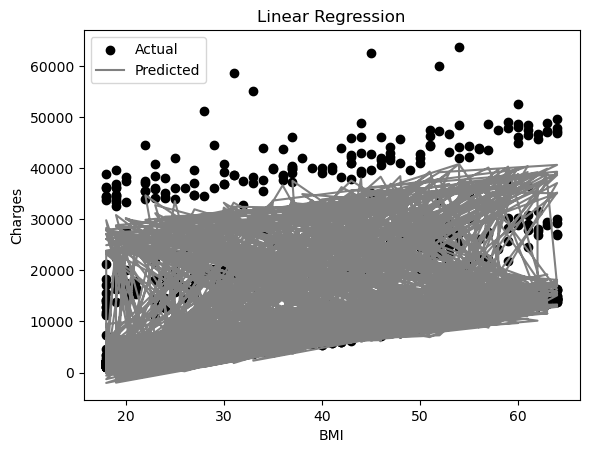

In [4]:
# Plotting the training data
plt.scatter(x_train[:, 0], y_train, color='black', label='Actual')
plt.plot(x_train[:, 0], y_pred, color='grey', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Linear Regression')
plt.legend()
plt.show()